In [1]:
import numpy as np
import pygrib

In [2]:
from tqdm import tqdm

In [3]:
import netCDF4
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists

In [4]:
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

In [5]:
#read in all the HRRR files
import glob
files = glob.glob("c:/Users/jorda/Downloads/20160413/*.grib2")
files.sort()
files

['c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t03z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t04z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t05z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t06z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t07z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t08z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t09z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t10z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t11z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t12z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t13z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t14z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\20160413_hrrr.t15z.wrfprsf00.grib2',
 'c:/Users/jorda/Downloads/20160413\\2

In [7]:
file_list = []
for file in tqdm(files[0:17]):
     file_list.append(xr.open_dataset(file, filter_by_keys={'typeOfLevel': 'atmosphere'}))
ds = xr.concat(file_list, dim="time")

100%|██████████| 17/17 [00:30<00:00,  1.81s/it]


In [8]:
ds

<xarray.Dataset>
Dimensions:     (time: 17, x: 1799, y: 1059)
Coordinates:
  * time        (time) datetime64[ns] 2016-04-13T03:00:00 ... 2016-04-13T19:0...
    step        timedelta64[ns] 00:00:00
    atmosphere  float64 0.0
    latitude    (y, x) float64 21.14 21.14 21.15 21.16 ... 47.86 47.85 47.84
    longitude   (y, x) float64 237.3 237.3 237.3 237.4 ... 299.0 299.0 299.1
    valid_time  (time) datetime64[ns] 2016-04-13T03:00:00 ... 2016-04-13T19:0...
Dimensions without coordinates: x, y
Data variables:
    refc        (time, y, x) float32 -10.0 -10.0 -10.0 ... -10.0 -10.0 -10.0
    veril       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tcc         (time, y, x) float32 95.88 96.25 95.75 95.5 ... 69.88 69.0 67.75
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2021-07-22T13:55 GRIB to CDM+CF via cfgrib-0.9.9...

In [9]:
ref = ds.refc
vert_int_liq = ds.veril
cloud = ds.tcc
states_provinces = cp.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

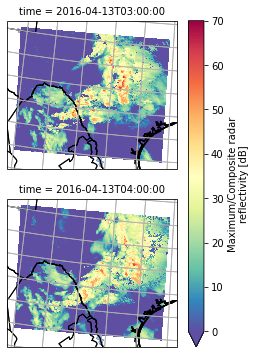

In [11]:
# Plot reflectivity
pref = ref.isel(time=[0,1]).sel(x=slice(700,940),y=slice(100,300)).plot(x="longitude", y="latitude", row="time", transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.Orthographic(-90, 40)},vmin=0,vmax=70,cmap="Spectral_r")
for i in range(2):
    pref.axes[i,0].coastlines()
    pref.axes[i,0].gridlines() 

for i in range(2):
    #pref.axes[i,0].add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray', facecolor='none')
    pref.axes[i,0].gridlines()
    pref.axes[i,0].add_feature(cp.feature.LAKES, edgecolor='black')
    pref.axes[i,0].add_feature(cp.feature.BORDERS, edgecolor='black')
    pref.axes[i,0].add_feature(cp.feature.LAKES)
    pref.axes[i,0].add_feature(cp.feature.STATES, edgecolor='black')
    pref.axes[i,0].coastlines()

plt.draw()

plt.savefig('c:/Users/jorda/Downloads/refovertexas.png',dpi=300)

C:\Users\jorda\anaconda3\envs\hagelslag\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
C:\Users\jorda\anaconda3\envs\hagelslag\lib\site-packages\xarray\plot\facetgrid.py:394: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


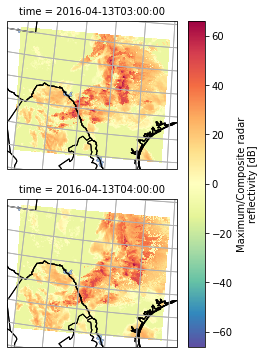

In [27]:
# Plot reflectivity
pref = ref.isel(time=[0,1]).sel(x=slice(700,940),y=slice(100,300)).plot(x="longitude", y="latitude", row="time", transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.Orthographic(-90, 40)},cmap="Spectral_r")
for i in range(2):
    pref.axes[i,0].coastlines()
    pref.axes[i,0].gridlines() 

for i in range(2):
    #pref.axes[i,0].add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray', facecolor='none')
    pref.axes[i,0].gridlines()
    pref.axes[i,0].add_feature(cp.feature.LAKES, edgecolor='black')
    pref.axes[i,0].add_feature(cp.feature.BORDERS, edgecolor='black')
    pref.axes[i,0].add_feature(cp.feature.LAKES)
    pref.axes[i,0].add_feature(cp.feature.STATES, edgecolor='black')
    pref.axes[i,0].coastlines()

plt.draw()

plt.savefig('c:/Users/jorda/Downloads/ref03ztex.png',dpi=300)

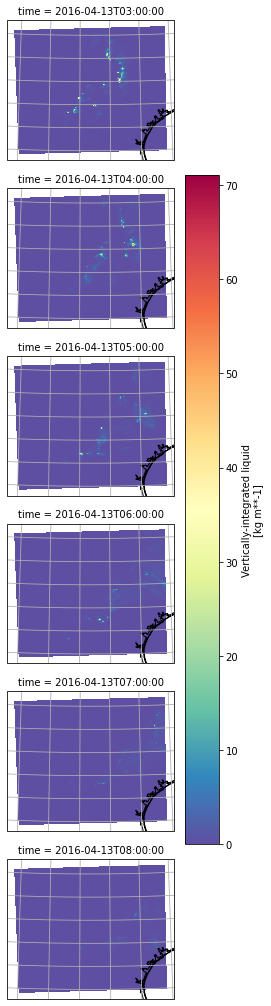

In [20]:
phail = vert_int_liq.isel(time=[0,1,2,3,4,5]).sel(x=slice(700,940),y=slice(100,300)).plot(x="longitude", y="latitude", row="time", transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.Orthographic(-100, 35)},cmap="Spectral_r")
for i in range(6):
    phail.axes[i,0].coastlines()
    phail.axes[i,0].gridlines()

for i in range(6):
    #pref.axes[i,0].add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray', facecolor='none')
    pref.axes[i,0].gridlines()
    pref.axes[i,0].add_feature(cp.feature.LAKES, edgecolor='black')
    pref.axes[i,0].add_feature(cp.feature.BORDERS, edgecolor='black')
    pref.axes[i,0].add_feature(cp.feature.STATES, edgecolor='black')
    pref.axes[i,0].coastlines()

    
plt.draw()

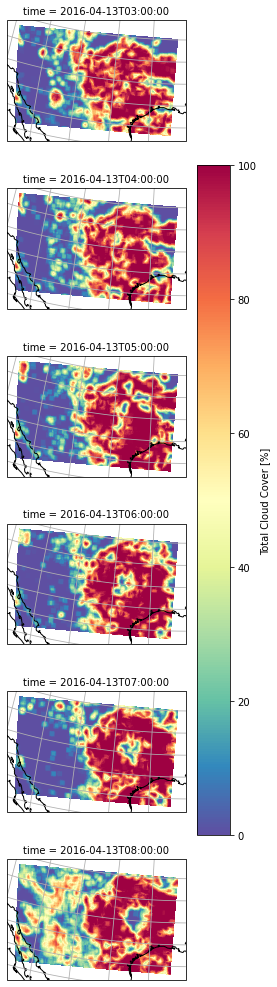

In [11]:
pcloud = cloud.isel(time=[0,1,2,3,4,5]).sel(x=slice(400,1075),y=slice(90,500)).plot(x="longitude", y="latitude", row="time", transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.Orthographic(-90, 40)},cmap="Spectral_r", vmin=0)
for i in range(6):
    pcloud.axes[i,0].coastlines()
    pcloud.axes[i,0].gridlines()

for i in range(6):
    #pref.axes[i,0].add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray', facecolor='none')
    pref.axes[i,0].gridlines()
    pref.axes[i,0].add_feature(cp.feature.LAKES, edgecolor='black')
    pref.axes[i,0].add_feature(cp.feature.BORDERS, edgecolor='black')
    pref.axes[i,0].add_feature(cp.feature.STATES, edgecolor='black')
    pref.axes[i,0].coastlines()

plt.draw()

In [ ]:
#read in the mesh files
mrms_files = glob.glob("c:/Users/jorda/Downloads/MESH/*.grib2")
mrms_files.sort()
file_list = []
for file in mrms_files[200:400]:
     file_list.append(xr.open_dataset(file))
ds = xr.concat(file_list, dim="valid_time")

In [29]:
ds0 = xr.open_dataset('c:/Users/jorda/Downloads/MESH/MRMS_MESH_00.50_20160413-024839.grib2', engine='cfgrib')
ds1 = xr.open_dataset('c:/Users/jorda/Downloads/MESH/MRMS_MESH_00.50_20160413-025040.grib2', engine='cfgrib')
ds2 = xr.open_dataset('c:/Users/jorda/Downloads/MESH/MRMS_MESH_00.50_20160413-025241.grib2', engine='cfgrib')
ds3 = xr.open_dataset('c:/Users/jorda/Downloads/MESH/MRMS_MESH_00.50_20160413-030041.grib2', engine='cfgrib')
states_provinces = cp.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

In [30]:
ds0 = ds0.where(ds0.unknown > 0)
ds0 

ds1 = ds1.where(ds1.unknown > 0)
ds2 = ds2.where(ds2.unknown > 0)
ds3 = ds3.where(ds3.unknown > 0)

In [10]:
mesh = ds0.unknown

<ipython-input-33-8baa0c68029e>:17: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig('c:/Users/jorda/Downloads/MESHsanAn.png',dpi=300)


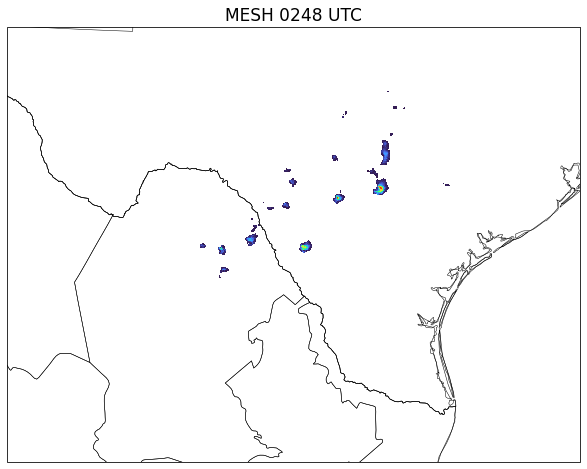

In [33]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Create the figure and plot background on different axes


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 8), constrained_layout=True,
                          subplot_kw={'projection': crs})
ax.set_extent([255., 265., 25., 32.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)


ax.pcolormesh(ds0.longitude,ds0.latitude,ds0.unknown.values,vmin=0,cmap='turbo',transform=ccrs.PlateCarree())
plt.title('MESH 0248 UTC', fontsize=17)

plt.savefig('c:/Users/jorda/Downloads/MESHsanAn.png',dpi=300)

Text(0.5, 1.0, 'MESH 0250 UTC')

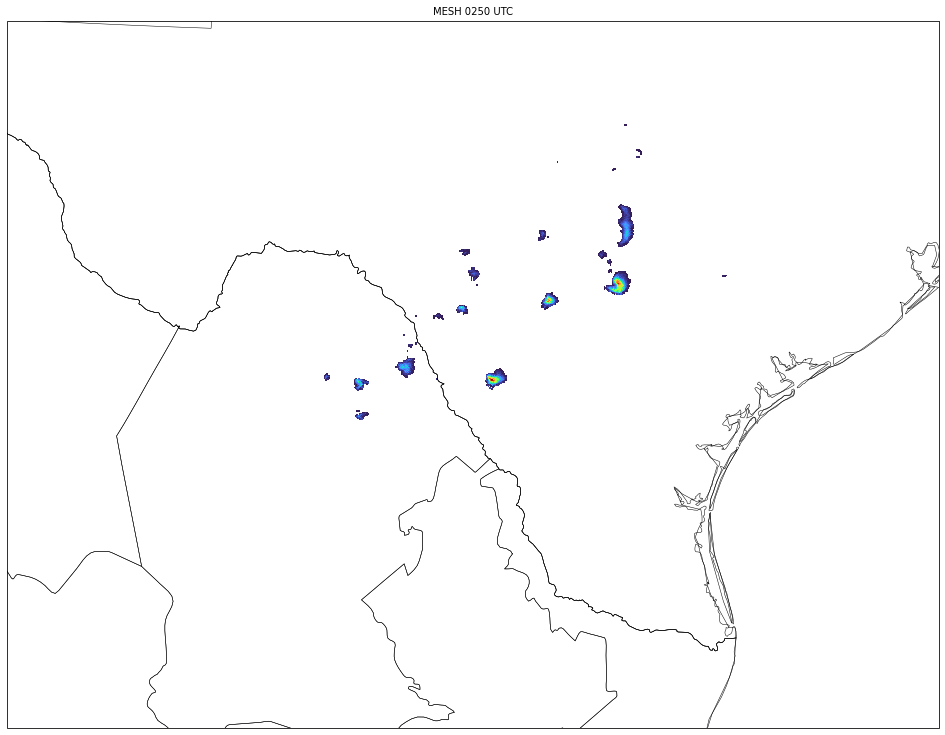

In [16]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Create the figure and plot background on different axes

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 13), constrained_layout=True,
                          subplot_kw={'projection': crs})
ax.set_extent([255., 265., 25., 32.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)


ax.pcolormesh(ds1.longitude,ds1.latitude,ds1.unknown.values,vmin=0,cmap='turbo',transform=ccrs.PlateCarree())
plt.title('MESH 0250 UTC', fontsize='medium')

Text(0.5, 1.0, 'MESH 0252 UTC')

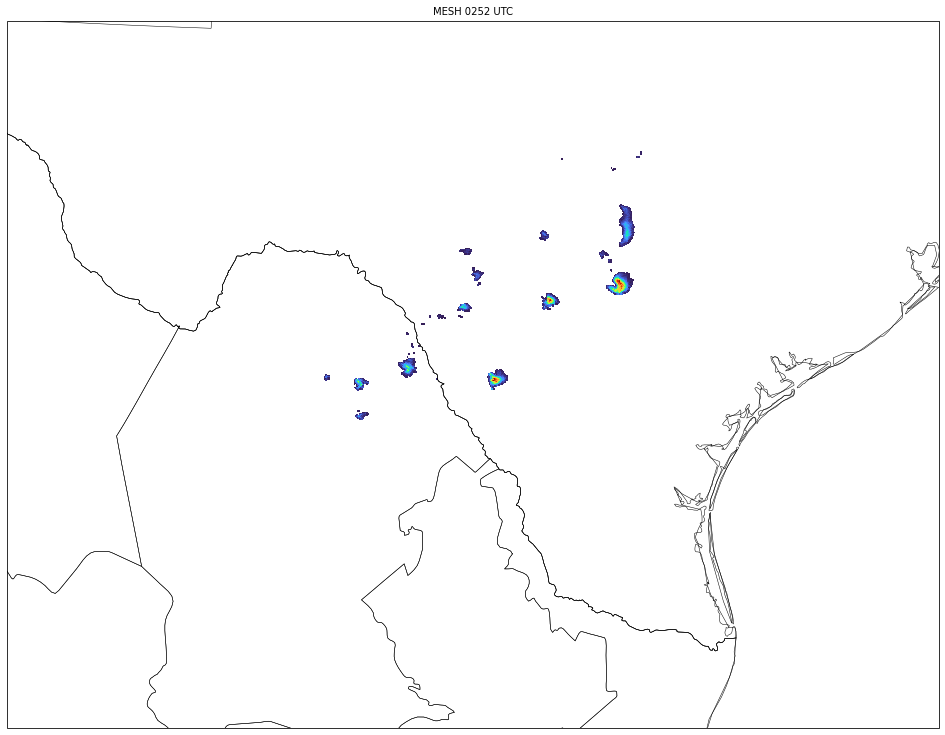

In [17]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Create the figure and plot background on different axes

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 13), constrained_layout=True,
                          subplot_kw={'projection': crs})
ax.set_extent([255., 265., 25., 32.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)


ax.pcolormesh(ds2.longitude,ds2.latitude,ds2.unknown.values,vmin=0,cmap='turbo',transform=ccrs.PlateCarree())
plt.title('MESH 0252 UTC', fontsize='medium')

Text(0.5, 1.0, 'MESH 0304 UTC')

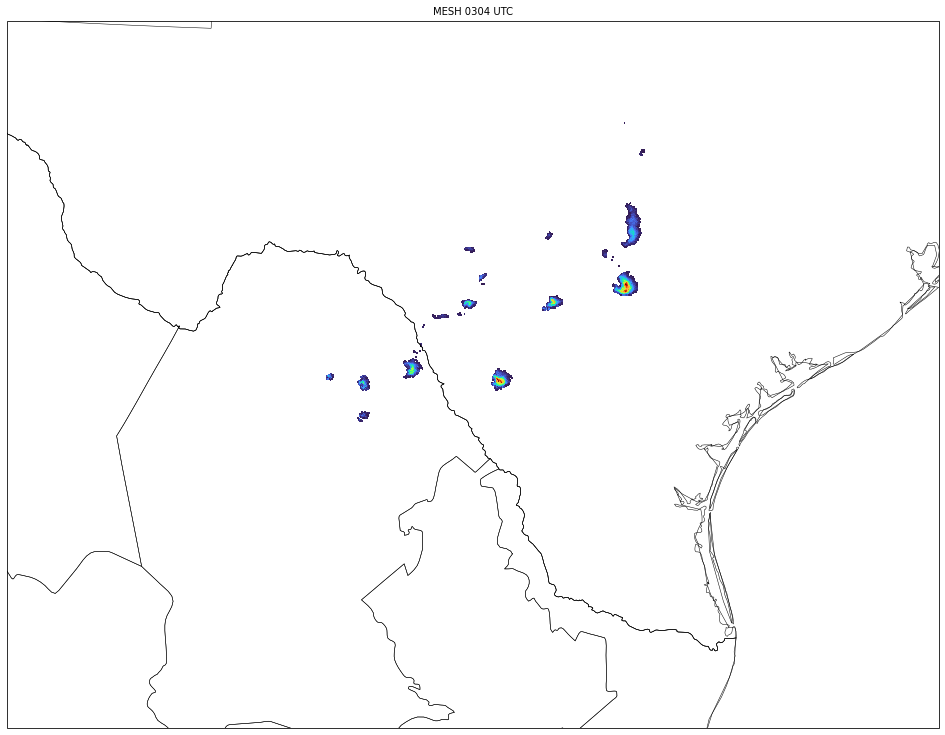

In [19]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 13), constrained_layout=True,
                          subplot_kw={'projection': crs})




ax.set_extent([255.,265.,25.,32.])


ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

#Add title
ax.pcolormesh(ds3.longitude,ds3.latitude,ds3.unknown.values,vmin=0,cmap='turbo',transform=ccrs.PlateCarree())
plt.title('MESH 0304 UTC', fontsize='medium')